In [1]:
# Pagamento banco loan
import pandas as pd
import numpy as np

import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
fonte = 'https://github.com/Diego-Sarti-19/SSarti_Dados_GIT/blob/main/Logit_LIT_Modelo.CSV?raw=true'

In [3]:
data_set = pd.read_csv(fonte, sep =';')

In [4]:
data_set.head(5)

,idade,educ,emprego,endec,renda,debt,outras,default
0,41,3,18,7,176,"10,3","5,008608",1
1,27,1,10,6,31,"17,3","4,000798",0
2,40,1,15,14,55,"5,5","2,168925",0
3,41,1,15,14,120,"2,9","0,82128",0
4,24,2,2,0,28,"17,3","3,056564",1


In [5]:
# corrigindo dados - trocando , por '.' e mudando para float
data_set['debt'] = data_set['debt'].str.replace(',','.')
data_set['outras'] = data_set['outras'].str.replace(',','.')

In [6]:
# convertendo para float
data_set['debt'] = data_set['debt'].astype(float)
data_set['outras'] = data_set['outras'].astype(float)

In [7]:
data_set.head(3)

,idade,educ,emprego,endec,renda,debt,outras,default
0,41,3,18,7,176,10.3,5.008608,1
1,27,1,10,6,31,17.3,4.000798,0
2,40,1,15,14,55,5.5,2.168925,0


In [8]:
# Separando a variável dependente e independente
y = data_set['default']

In [9]:
x = data_set[[
#              'idade', 
#              'educ', 
              'emprego', 
              'endec', 
              'renda', 
              'debt', 
#              'outras'
                    ]]

In [10]:
# acrescenta intercepto
x = sm.add_constant(x)
sm_model = sm.Logit(y, x).fit(disp=0)


In [11]:
y_predict = sm_model.predict(x)

In [12]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  500
Model:                          Logit   Df Residuals:                      495
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.2408
Time:                        13:01:53   Log-Likelihood:                -216.73
converged:                       True   LL-Null:                       -285.48
Covariance Type:            nonrobust   LLR p-value:                 9.699e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9597      0.296     -6.625      0.000      -2.539      -1.380
emprego       -0.1844      0.029     -6.358      0.000      -0.241      -0.128
endec         -0.0600      0.022     -2.782      0.005      -0.102      -0.018
renda          0.0202      0.005      3.736      0.000       0.010       0.031
debt           0.1573      0.020      8.046      0.000       0.119       0.196
==============================================================================
"""

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [14]:
y_prob = sm_model.predict(x)
# Convertendo saída para um DataFrrame
y_prob_df =pd.DataFrame(y_prob, columns=['probabilidade_y'])

In [15]:
# Adiciona uma coluna com base em uma sentença condicional
y_prob_df['previsto'] = [1 if probabilidade_y > 0.5 else '0' for probabilidade_y in y_prob_df['probabilidade_y']]
y_predict = y_prob_df['previsto'].astype('int64')

In [33]:
y_prob = sm_model.predict(x)
# COnvertendo saída para um DataFrrame
y_prob_df =pd.DataFrame(y_prob, columns=['probabilidade_y'])

In [34]:
y

0      1
1      0
2      0
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    1
Name: default, Length: 500, dtype: int64

In [35]:
y_predict

0      0
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    1
Name: previsto, Length: 500, dtype: int64

In [36]:
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       371
           1       0.68      0.40      0.50       129

    accuracy                           0.80       500
   macro avg       0.75      0.67      0.69       500
weighted avg       0.78      0.80      0.78       500



In [37]:
cm = confusion_matrix(y, y_predict)
cm

array([[347,  24],
       [ 78,  51]], dtype=int64)

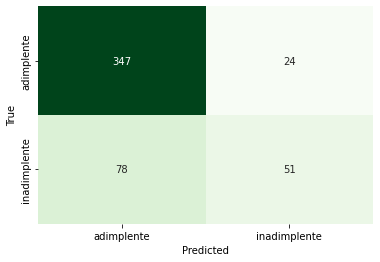

In [38]:
# Criar uma figura e um eixo
fig, ax = plt.subplots()

# Criar a matriz de calor usando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)

# Definir rótulos dos eixos
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.xaxis.set_ticklabels(['adimplente', 'inadimplente'])
ax.yaxis.set_ticklabels(['adimplente', 'inadimplente'])

# Exibir a figura
plt.show()

In [41]:
type(y_prob)

pandas.core.series.Series

In [42]:
np.shape(y_prob)

(500,)

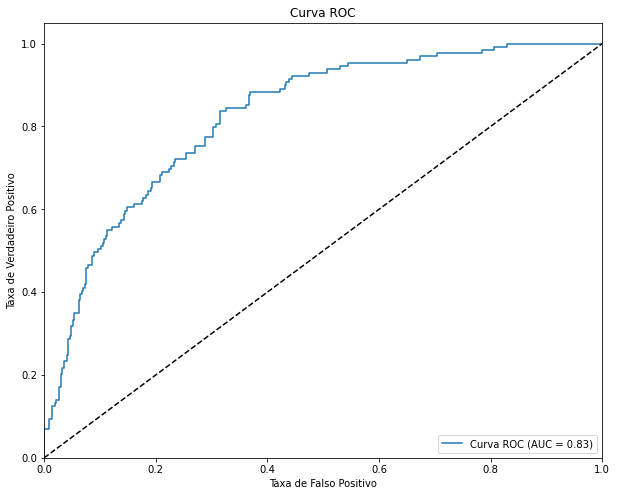

In [24]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [26]:
novos_valores = ([1.0, 3, 5, 60 ,17])

In [27]:
type(novos_valores)

list

In [28]:
y_prob = sm_model.predict(novos_valores)
y_prob

array([0.74464906])

In [29]:
import pickle
with open('credit_model','wb') as f:
    pickle.dump(sm_model, f)